In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
df=pd.read_excel('premiums_young.xlsx')
df.head(3)

,Unnamed: 0,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,10,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


### Modyfying Column Names

In [4]:
df.columns=df.columns.str.replace(' ',"_").str.lower()

In [5]:
df.head(3)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,10,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857


### Handling NA Values

In [6]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

unnamed:_0               0
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000
mean,24936.724725,20.988609,0.715840,22.653585,8161.883237
std,14438.718934,1.998258,0.938388,23.777397,2764.254265
min,4.000000,18.000000,-3.000000,1.000000,3501.000000
25%,12279.000000,19.000000,0.000000,6.000000,6035.000000
50%,24873.000000,21.000000,0.000000,16.000000,7951.000000
75%,37374.000000,23.000000,1.000000,31.000000,9575.000000
max,49998.000000,24.000000,3.000000,790.000000,18186.000000


In [11]:
df[df.number_of_dependants<0].shape
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [12]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    17557.000000
mean         0.720283
std          0.934982
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

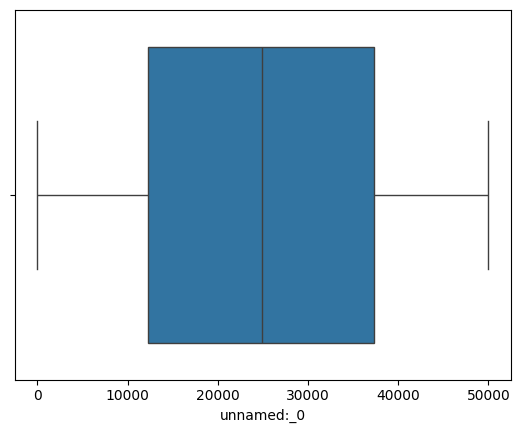

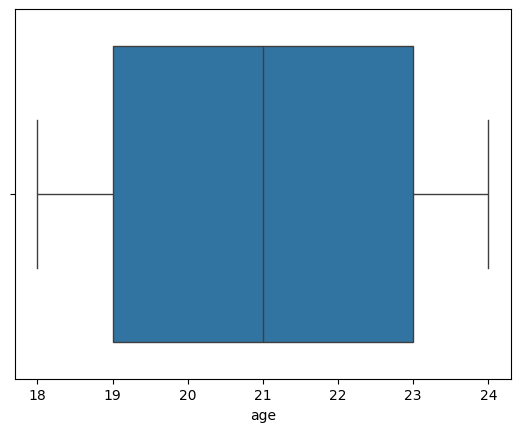

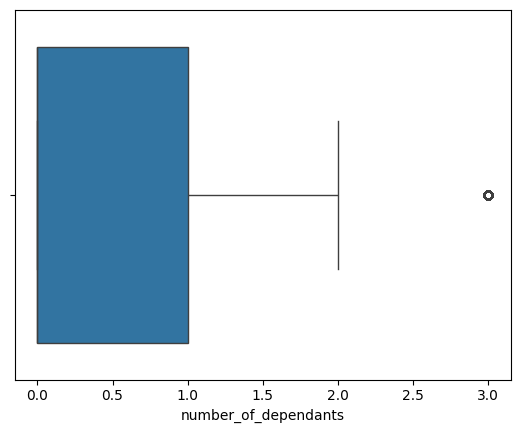

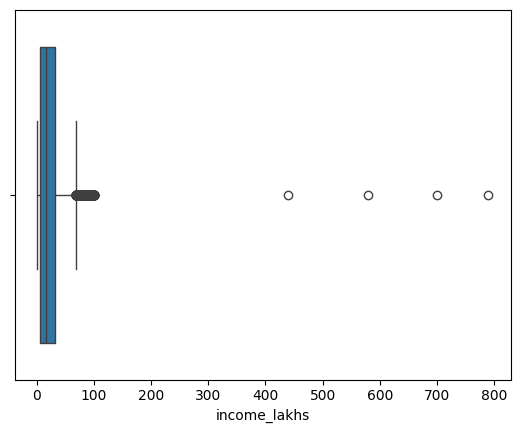

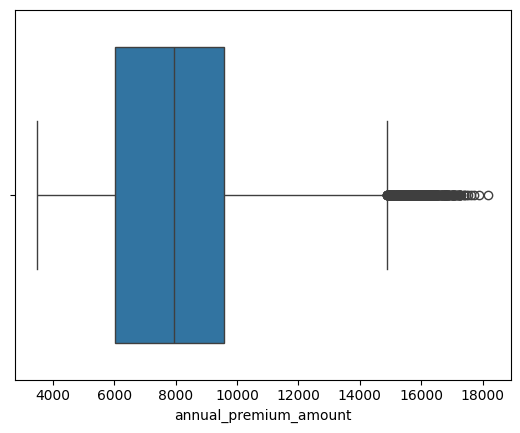

In [13]:
numerix_columns=df.select_dtypes(['float64','int64']).columns
for col in numerix_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [14]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [15]:
df1=df[df.age<100].copy()
df1.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,17557.000000,17557.000000,17557.000000,17557.000000,17557.000000
mean,24936.724725,20.988609,0.720283,22.653585,8161.883237
std,14438.718934,1.998258,0.934982,23.777397,2764.254265
min,4.000000,18.000000,0.000000,1.000000,3501.000000
25%,12279.000000,19.000000,0.000000,6.000000,6035.000000
50%,24873.000000,21.000000,0.000000,16.000000,7951.000000
75%,37374.000000,23.000000,1.000000,31.000000,9575.000000
max,49998.000000,24.000000,3.000000,790.000000,18186.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

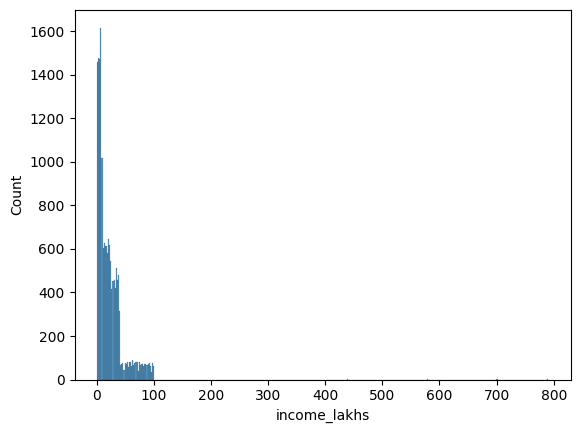

In [16]:
sns.histplot(df1.income_lakhs)

In [17]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     6.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [18]:
def get_iqr_bounds(col):
    Q1,Q3=df.income_lakhs.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3 + 1.5*IQR
    return lower_bound,upper_bound

In [19]:
quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [20]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,unnamed:_0,age,number_of_dependants,income_lakhs,annual_premium_amount
count,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000
mean,24940.028713,20.988606,0.720447,22.515752,8161.547884
std,14438.577143,1.998457,0.935025,21.867015,2764.266929
min,4.000000,18.000000,0.000000,1.000000,3501.000000
25%,12288.000000,19.000000,0.000000,6.000000,6035.000000
50%,24877.000000,21.000000,0.000000,16.000000,7951.000000
75%,37375.000000,23.000000,1.000000,31.000000,9574.000000
max,49998.000000,24.000000,3.000000,100.000000,18186.000000


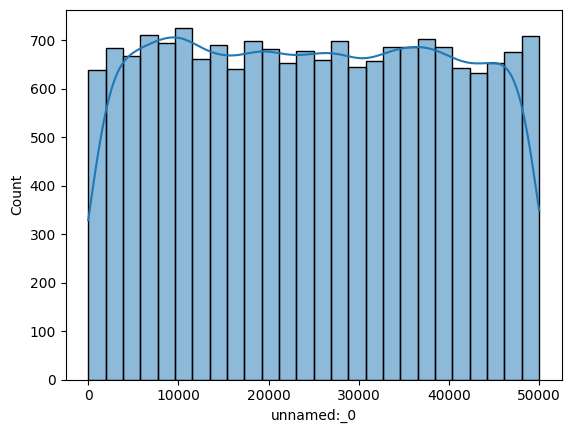

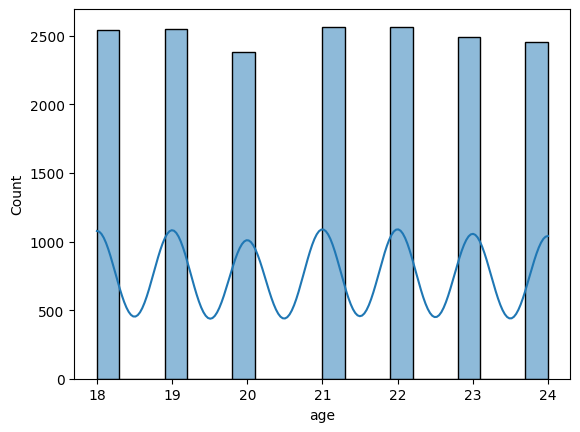

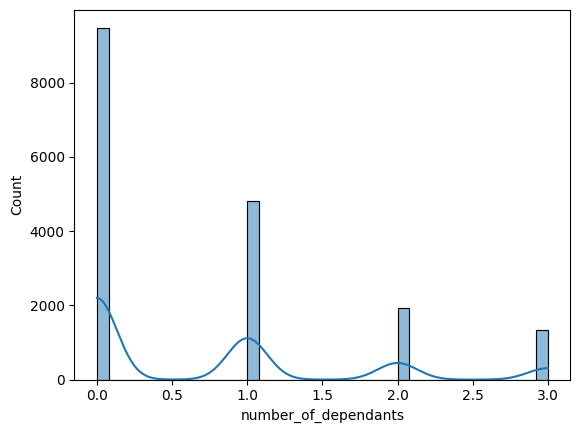

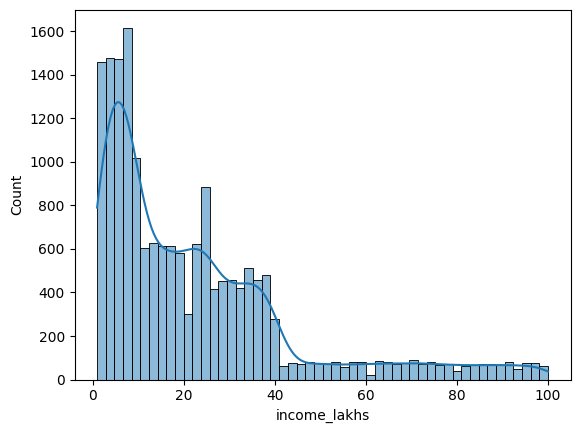

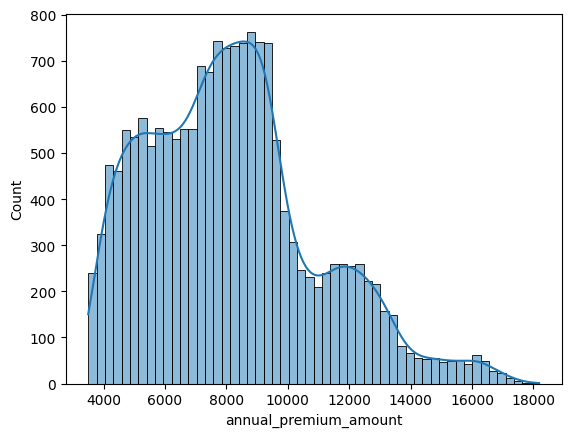

In [21]:
for col in numerix_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

In [22]:
categorical_col=df2.drop(['age','number_of_dependants','income_lakhs','annual_premium_amount'],axis='columns').columns.to_list()


In [23]:
for col in categorical_col:
    print(col,df2[col].unique())

unnamed:_0 [    4     9    10 ... 49995 49997 49998]
gender ['Male' 'Female']
region ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status ['Regular' 'No Smoking' 'Occasional' 'Not Smoking' 'Does Not Smoke'
 'Smoking=0']
employment_status ['Self-Employed' 'Freelancer' 'Salaried']
income_level ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan ['Silver' 'Bronze' 'Gold']


In [24]:
df2.replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking',},inplace=True)

In [25]:
for col in categorical_col:
    print(col,df2[col].unique())

unnamed:_0 [    4     9    10 ... 49995 49997 49998]
gender ['Male' 'Female']
region ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status ['Regular' 'No Smoking' 'Occasional']
employment_status ['Self-Employed' 'Freelancer' 'Salaried']
income_level ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan ['Silver' 'Bronze' 'Gold']


In [26]:
df2['gender'].value_counts(normalize=True)

gender
Male      0.549764
Female    0.450236
Name: proportion, dtype: float64

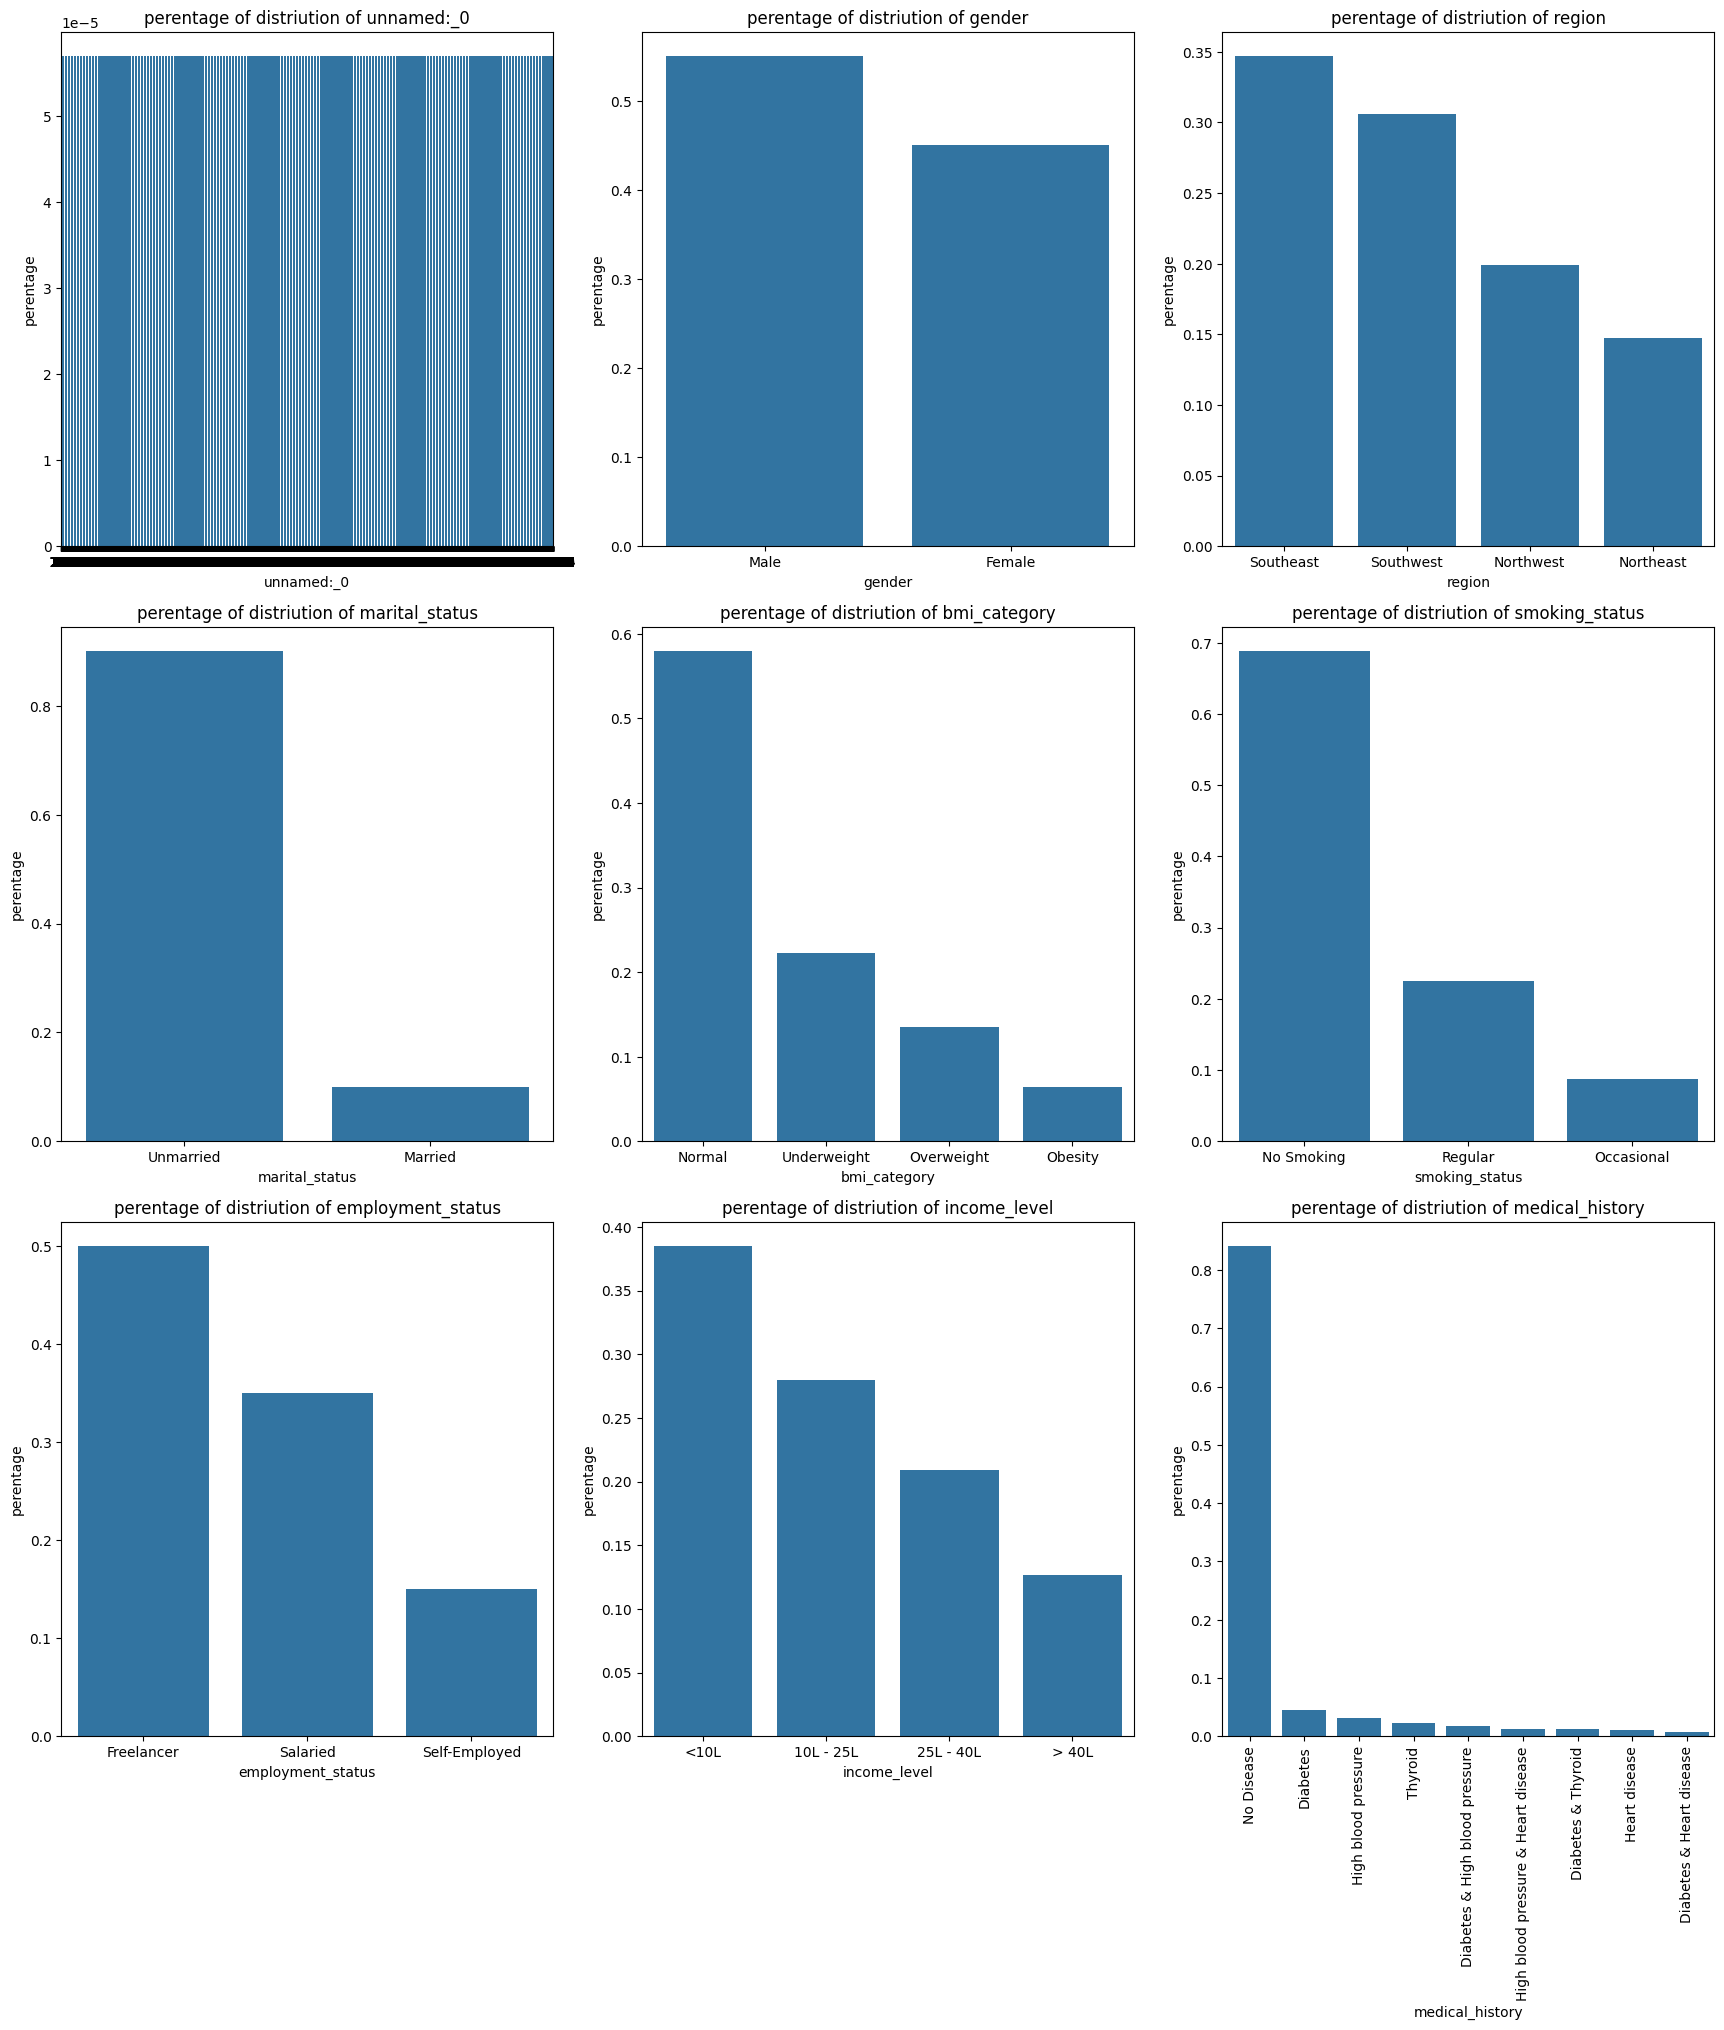

In [27]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
ax=axes.flatten()
for col,ax in zip(categorical_col,ax):
    category_counts=df2[col].value_counts(normalize=True)
    sns.barplot(x=category_counts.index,y=category_counts.values,ax=ax)
    ax.set_title(f'perentage of distriution of {col}')
    
    ax.set_ylabel('perentage')
    ax.set_xlabel(col)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
    

<Axes: xlabel='income_level'>

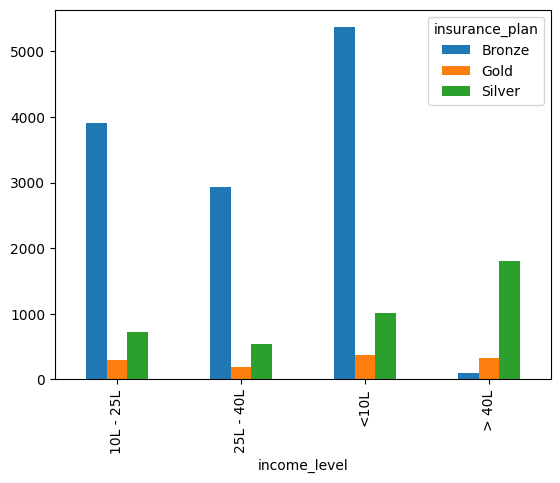

In [28]:
crosstab=pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab.plot(kind='bar')

In [29]:
df2.medical_history.unique()
df2.sample(5)

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
15047,42786,23,Female,Southwest,Unmarried,0,Obesity,No Smoking,Freelancer,> 40L,80,No Disease,Silver,12679
766,2258,24,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,25L - 40L,27,Diabetes,Bronze,4124
8856,25079,23,Female,Southeast,Unmarried,0,Underweight,No Smoking,Freelancer,> 40L,42,No Disease,Silver,8688
11602,33006,21,Male,Southeast,Unmarried,1,Normal,No Smoking,Salaried,10L - 25L,13,No Disease,Gold,11782
6073,17165,21,Male,Northeast,Unmarried,1,Normal,Regular,Freelancer,25L - 40L,37,Diabetes,Bronze,4836


In [30]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
1,9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None
2,10,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,None
3,19,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,None
4,21,22,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,30,High blood pressure,Gold,15473,high blood pressure,None


In [31]:
df2.fillna({'disease1':'none'},inplace=True)
df2.fillna({'disease2':'none'},inplace=True)
# df2['disease1'].replace('diabetes ','diabetes',inplace=True)
df2['total_risk_score']=0
df2['total_risk_score'] = df2['disease1'].map(risk_scores) + df2['disease2'].map(risk_scores)
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571
1,9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0,0.000000
2,10,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0,0.000000
3,19,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0,0.000000
4,21,22,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,30,High blood pressure,Gold,15473,high blood pressure,none,6,0.428571


In [32]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [33]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2.insurance_plan.unique()

array([2, 1, 3])

In [34]:
df2.head()

,unnamed:_0,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571
1,9,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,no disease,none,0,0.000000
2,10,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,no disease,none,0,0.000000
3,19,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,no disease,none,0,0.000000
4,21,22,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,30,High blood pressure,3,15473,high blood pressure,none,6,0.428571


In [35]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [36]:
df2['income_level']=df2['income_level'].map({'<10L':1,'10L - 25L':2,'> 40L':4, '25L - 40L':3})
df2.income_level.unique()

array([4, 1, 2, 3])

In [37]:
nominal_columns=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3=pd.get_dummies(df2,columns=nominal_columns,drop_first=True,dtype=int)
df3.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,9,22,0,1,3,No Disease,2,11050,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,10,21,0,4,97,No Disease,2,11857,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,19,20,2,2,14,No Disease,1,5712,no disease,none,...,1,0,1,0,1,0,0,0,0,0
4,21,22,0,3,30,High blood pressure,3,15473,high blood pressure,none,...,0,1,1,0,0,1,0,1,0,0


In [38]:
df4=df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,9,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,10,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,19,20,2,2,14,1,5712,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
4,21,22,0,3,30,3,15473,0.428571,0,0,0,1,1,0,0,1,0,1,0,0


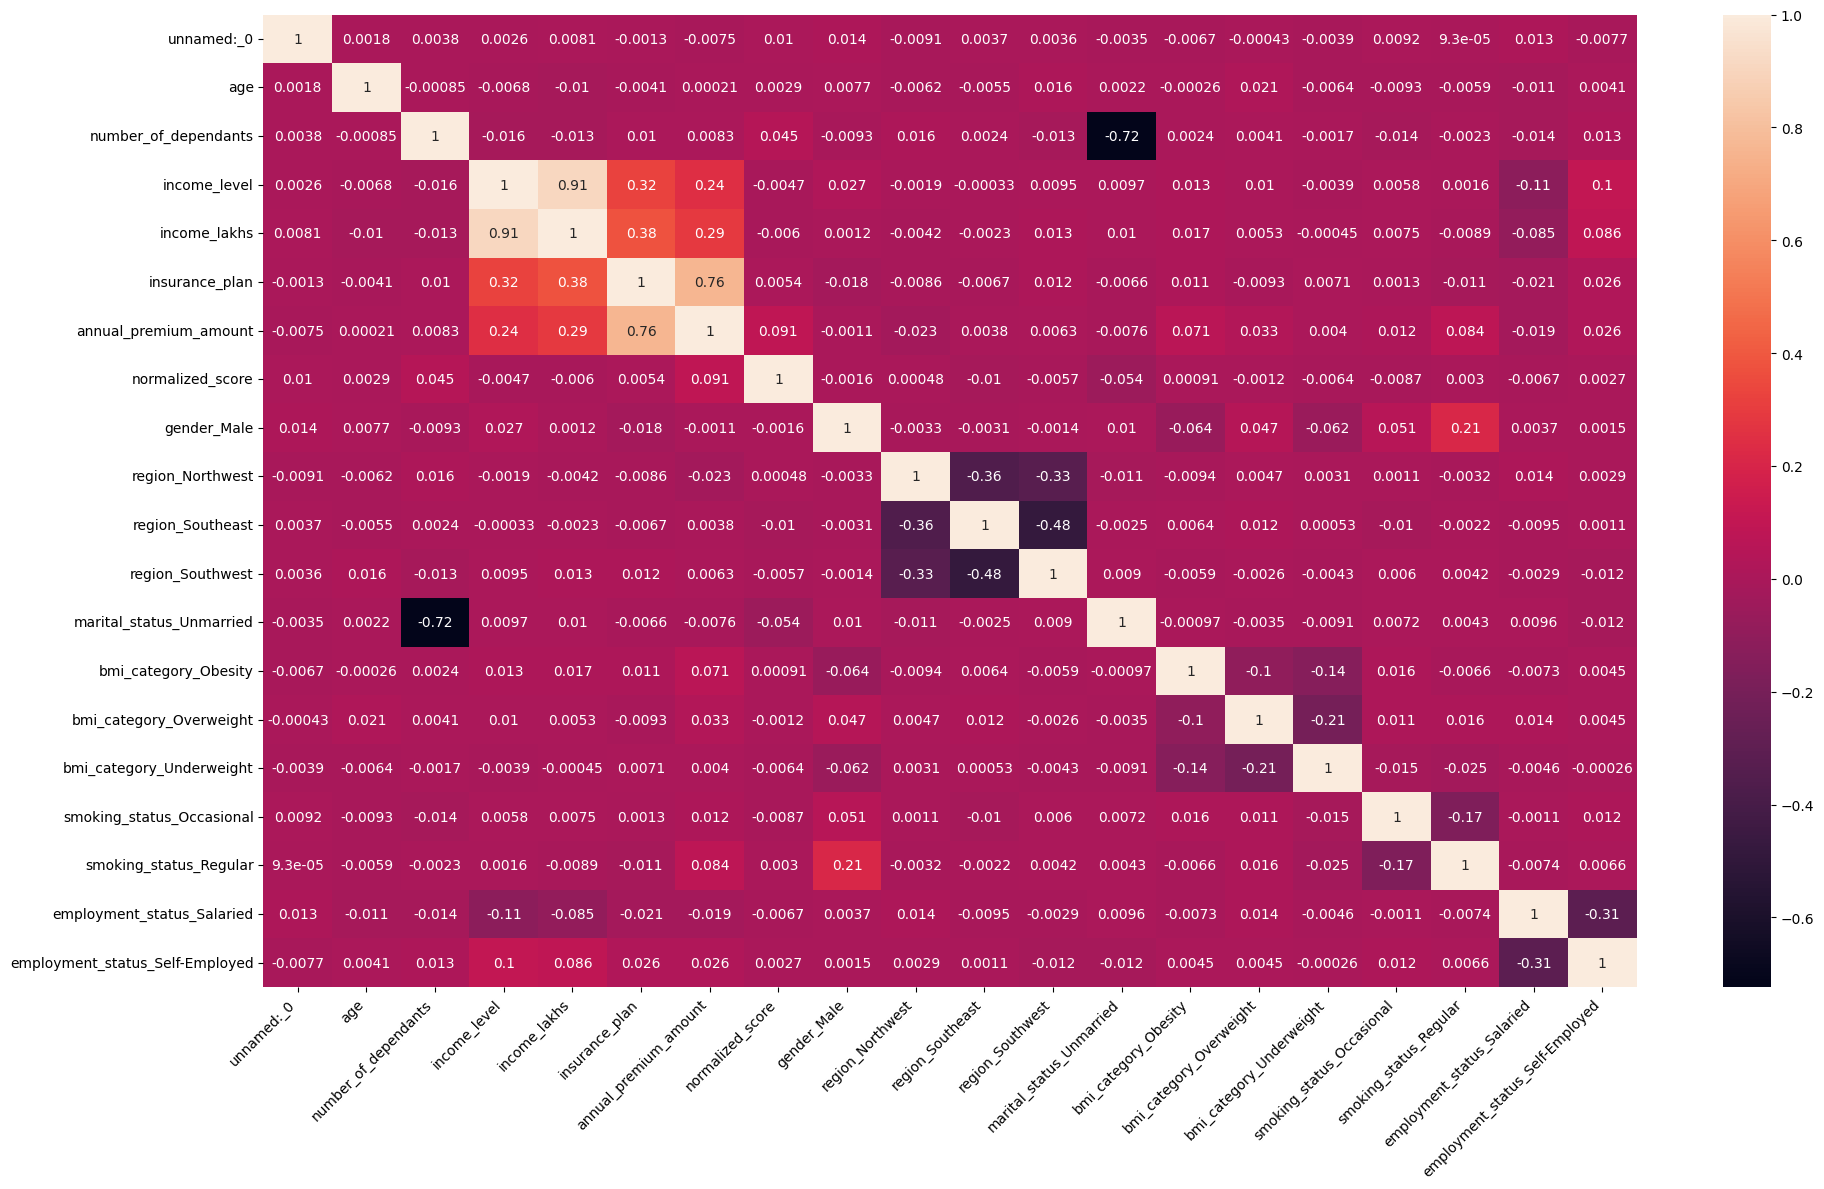

In [39]:
cm=df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler
X=df4.drop('annual_premium_amount',axis="columns")
y=df4['annual_premium_amount']
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000,17553.000000
mean,24940.028713,0.498101,0.240149,0.359236,0.217331,0.182533,0.091946,0.549764,0.199339,0.346721,0.306272,0.900131,0.063750,0.135077,0.222013,0.087108,0.225033,0.350310,0.150288
std,14438.577143,0.333076,0.311675,0.348758,0.220879,0.301750,0.229972,0.497532,0.399515,0.475940,0.460957,0.299834,0.244314,0.341815,0.415612,0.282001,0.417616,0.477081,0.357363
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12288.000000,0.166667,0.000000,0.000000,0.050505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24877.000000,0.500000,0.000000,0.333333,0.151515,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37375.000000,0.833333,0.333333,0.666667,0.303030,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,49998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

                   
calculate_vif(X)

,Column,VIF
0,unnamed:_0,3.725544
1,age,3.080756
2,number_of_dependants,1.955701
3,income_level,11.972037
4,income_lakhs,11.928229
5,insurance_plan,1.601324
6,normalized_score,1.155613
7,gender_Male,2.319204
8,region_Northwest,2.142144
9,region_Southeast,2.983081


In [42]:
X_reduecd=X.drop('income_level',axis="columns")
X_reduecd.head()

,unnamed:_0,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,4,0.000000,0.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,9,0.666667,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,10,0.500000,0.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,19,0.333333,0.666667,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0
4,21,0.666667,0.000000,0.292929,1.0,0.428571,0,0,0,1,1,0,0,1,0,1,0,0


#### MODEL TRAINING

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score=model_lr.score(X_train,y_train)
train_score,test_score

(0.6062767376093838, 0.606055836965401)

In [44]:
model_lr.intercept_

6624.197237379407

In [45]:
model_lr.coef_

array([-1.15393318e-03,  3.34177712e+01, -4.57740677e+01, -1.99234897e+02,
        3.20076932e+02,  7.00518380e+03,  1.03993678e+03, -3.75647909e+01,
       -9.58055996e+01,  1.52529733e+00, -4.23281332e+01, -6.65122118e+01,
        7.91467936e+02,  4.09323230e+02,  1.50276197e+02,  2.94776952e+02,
        6.47723072e+02, -3.86493035e+01,  8.80759881e+00])

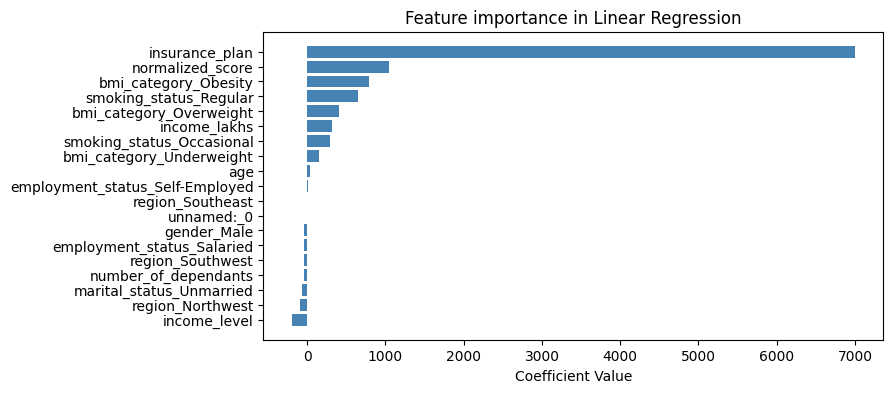

In [46]:
feature_importances=model_lr.coef_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [47]:
model_r=Ridge()
model_r.fit(X_train,y_train)
test_score=model_r.score(X_test,y_test)
train_score=model_r.score(X_train,y_train)
train_score,test_score

(0.6062761730968828, 0.6060693014969045)

In [48]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score=model_xgb.score(X_train,y_train)
train_score,test_score

(0.7791855931282043, 0.5535245537757874)

In [49]:
y_pred=model_xgb.predict(X_test)
mse_xgb=mean_squared_error(y_test,y_pred)
rmse_xgb=np.sqrt(mse_xgb)
rmse_xgb

1847.3006627285665

In [50]:
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
random_search.fit(X_train,y_train)
random_search.best_score_

/home/yashwanth/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.6025562485059103

In [51]:
random_search.best_params_

{'n_estimators': 40, 'max_depth': 3, 'learning_rate': 0.2}

In [52]:
best_model=random_search.best_estimator_

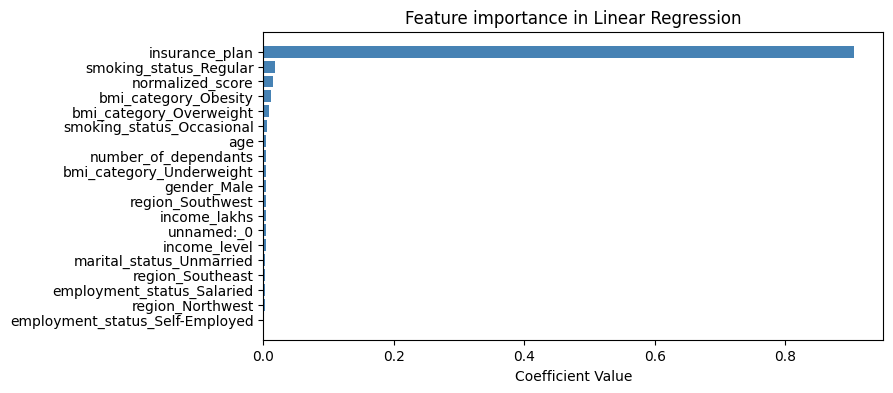

In [53]:
feature_importances=best_model.feature_importances_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

### ERROR ANLYSIS

In [54]:
y_pred=best_model.predict(X_test)
residuals=y_pred-y_test
residuals_pct = residuals*100/y_test
results_df=pd.DataFrame({'actual':y_test,'predicted':y_pred,'diff':residuals,'diff_pct':residuals_pct})
results_df.head()

,actual,predicted,diff,diff_pct
5184,9525,6921.068848,-2603.931152,-27.337860
4370,11900,10720.230469,-1179.769531,-9.914030
10550,5606,6731.920898,1125.920898,20.084212
15707,8438,6595.957520,-1842.042480,-21.830321
4692,7626,6809.033691,-816.966309,-10.712907


<Axes: xlabel='diff_pct', ylabel='Count'>

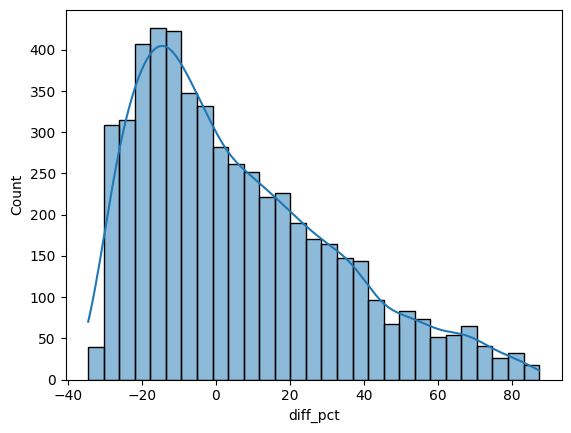

In [55]:
sns.histplot(results_df['diff_pct'],kde=True)

In [56]:
error_threshold=10
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>error_threshold]
extreme_resutls_df

,actual,predicted,diff,diff_pct
5184,9525,6921.068848,-2603.931152,-27.337860
10550,5606,6731.920898,1125.920898,20.084212
15707,8438,6595.957520,-1842.042480,-21.830321
4692,7626,6809.033691,-816.966309,-10.712907
9212,5365,6546.065430,1181.065430,22.014267
...,...,...,...,...
5813,3947,6683.161621,2736.161621,69.322565
17516,8377,6589.069824,-1787.930176,-21.343323
10399,7877,10960.180664,3083.180664,39.141560
13224,7519,9989.504883,2470.504883,32.856828


In [57]:
extreme_error_pct=extreme_resutls_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

72.90163311811622

In [58]:
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct',ascending=False)
extreme_resutls_df

,actual,predicted,diff,diff_pct
8902,3501,6562.243652,3061.243652,87.439122
17434,3751,6993.920898,3242.920898,86.454836
3657,3517,6549.280273,3032.280273,86.217807
6564,3523,6559.803223,3036.803223,86.199353
13716,3603,6703.526855,3100.526855,86.054034
...,...,...,...,...
2758,4381,6581.355957,2200.355957,50.224970
5295,4438,6666.793457,2228.793457,50.220673
10811,4540,6818.018066,2278.018066,50.176609
14296,4594,6895.405762,2301.405762,50.095903


In [59]:
extreme_error_df=X_test.loc[extreme_resutls_df.index]
extreme_error_df.head()

,unnamed:_0,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
8902,25207,0.833333,0.333333,0.0,0.050505,0.0,0.0,0,0,0,1,1,0,0,0,0,0,1,0
17434,49673,0.666667,0.000000,0.0,0.030303,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0
3657,10288,1.000000,0.000000,0.0,0.000000,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
6564,18564,1.000000,0.333333,0.0,0.070707,0.0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
13716,38889,0.166667,0.000000,0.0,0.080808,0.0,0.0,0,0,0,1,1,0,0,1,0,0,0,0


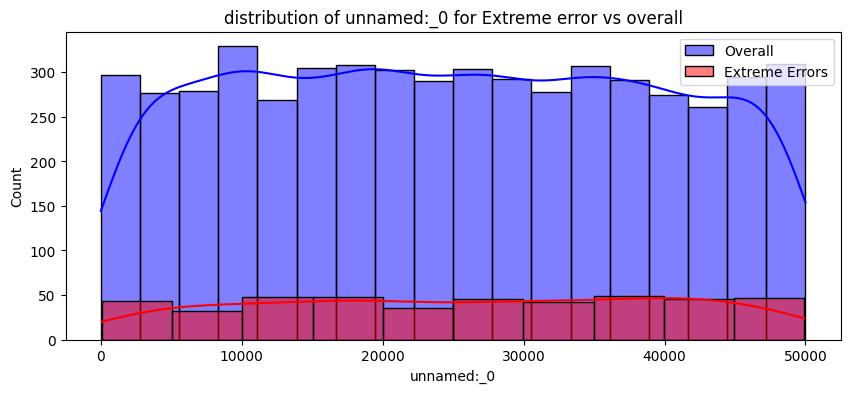

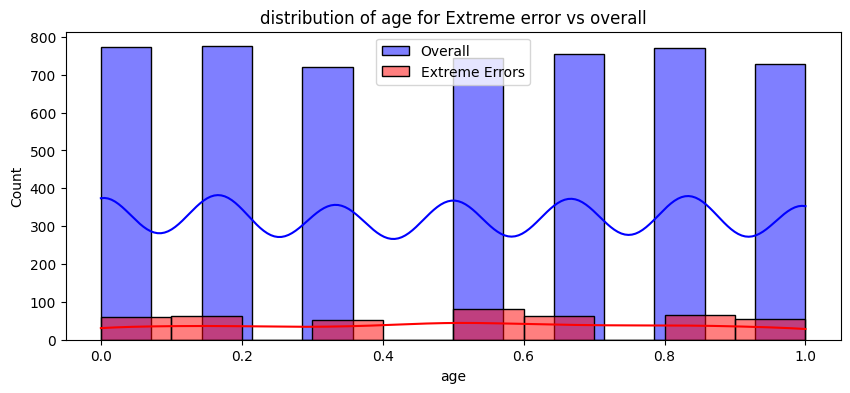

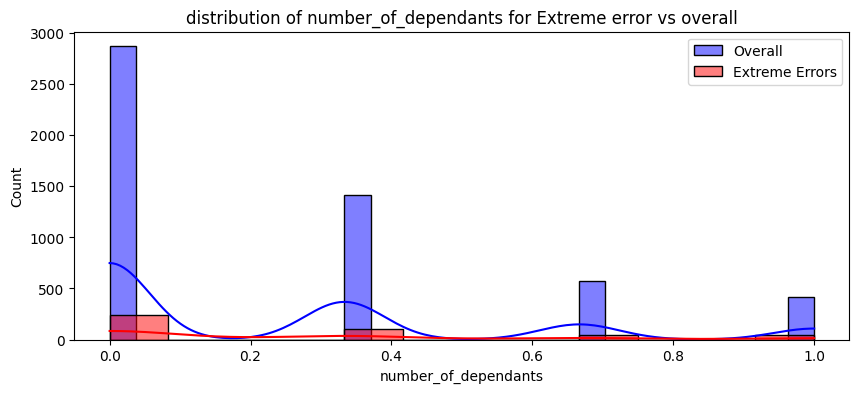

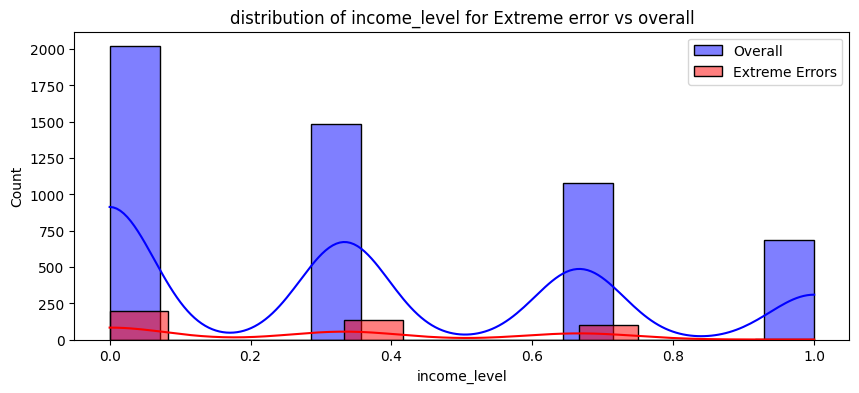

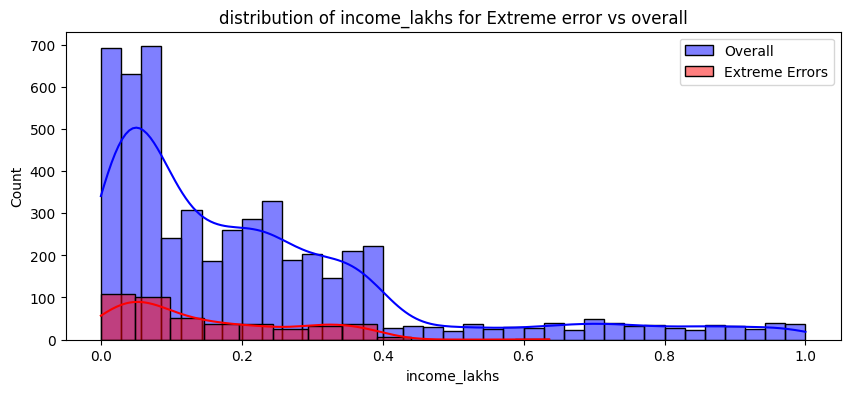

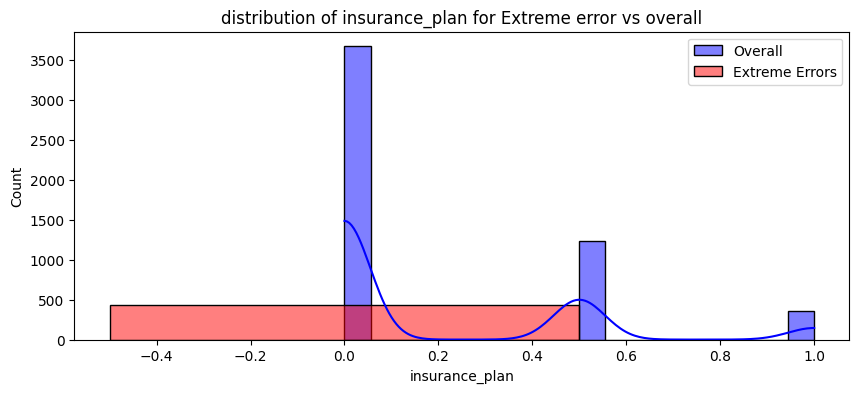

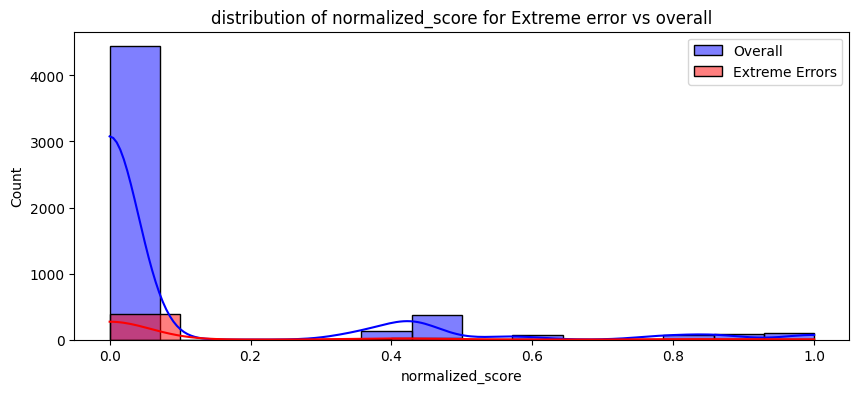

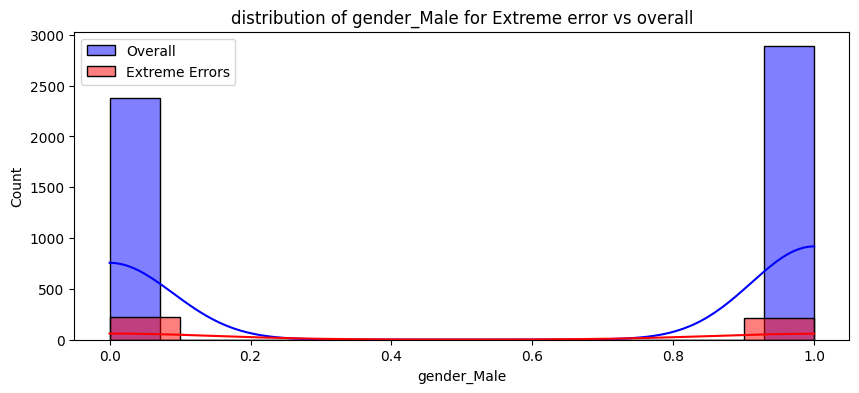

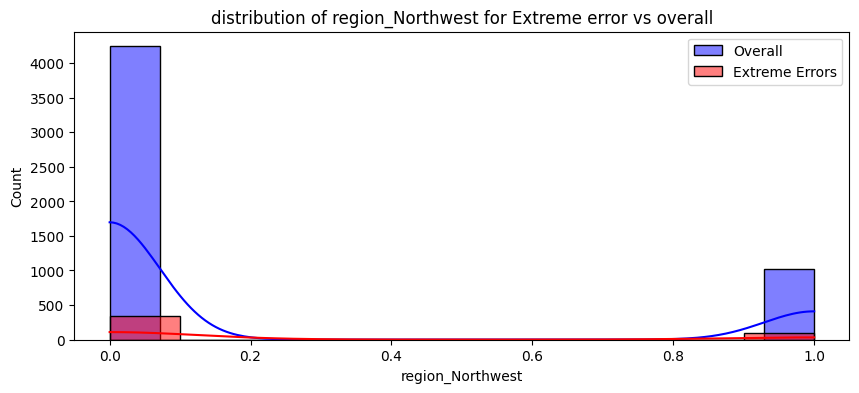

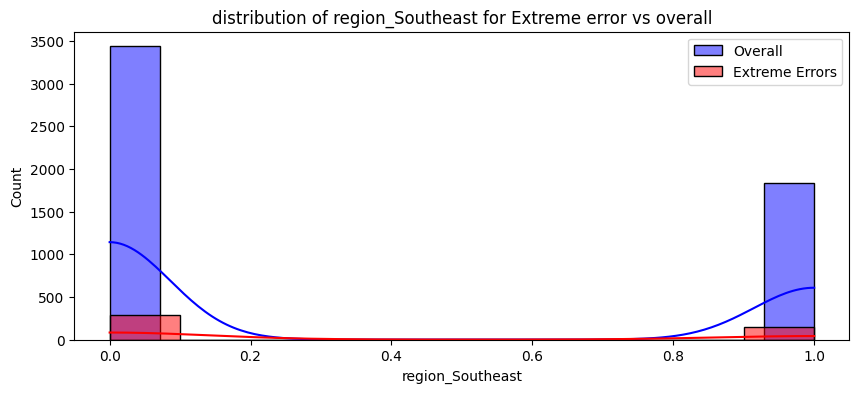

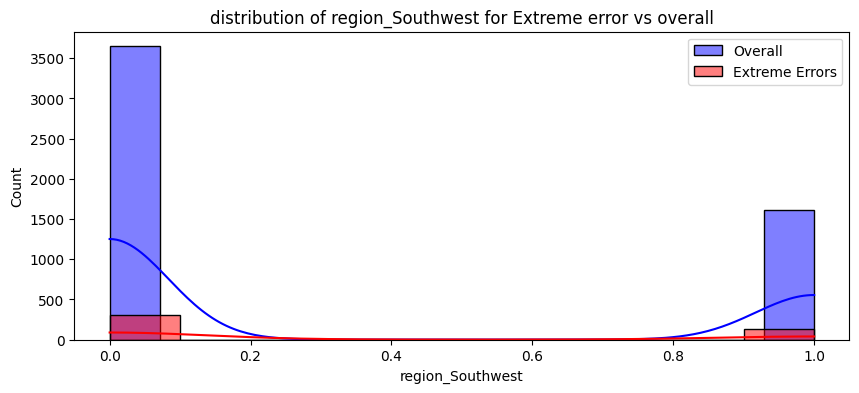

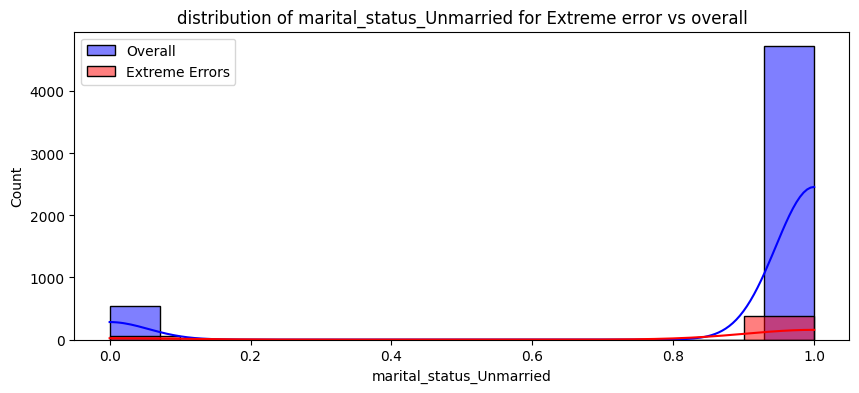

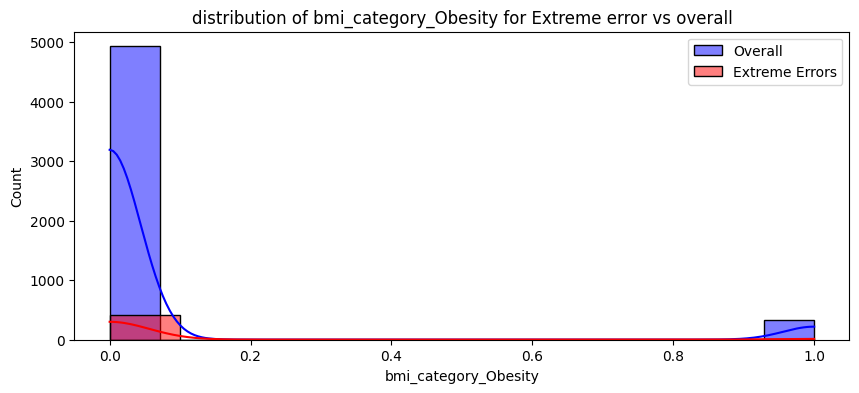

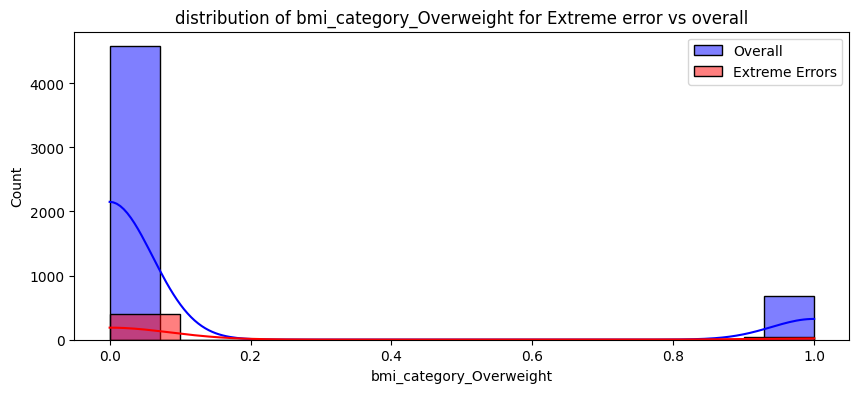

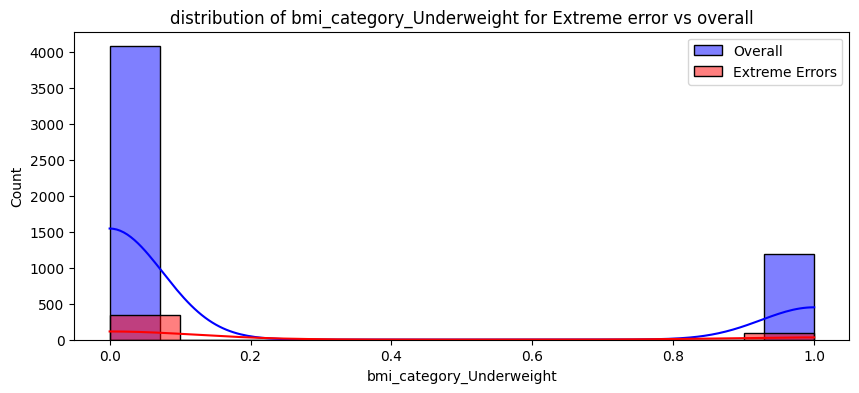

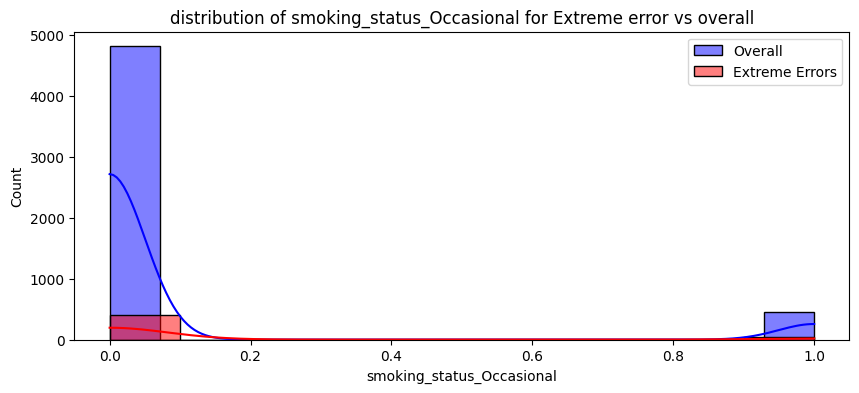

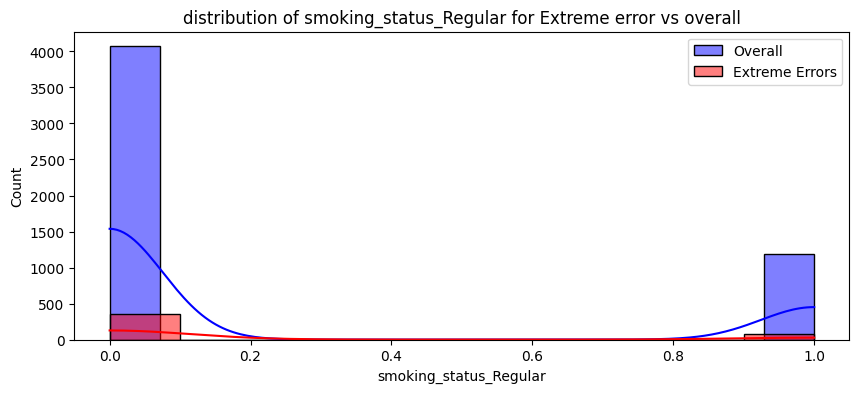

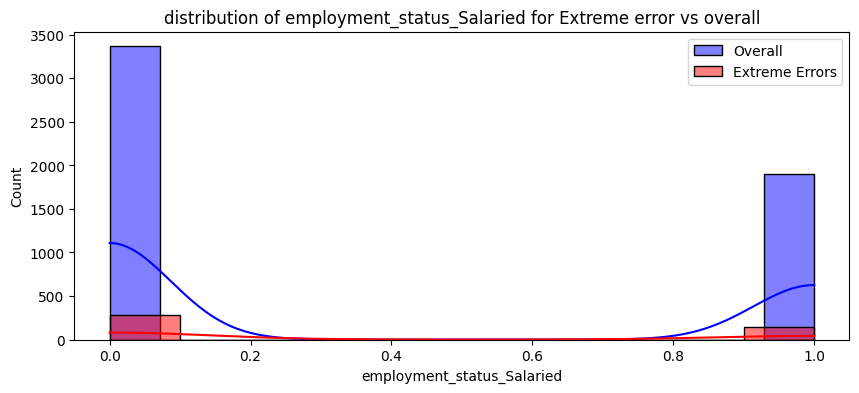

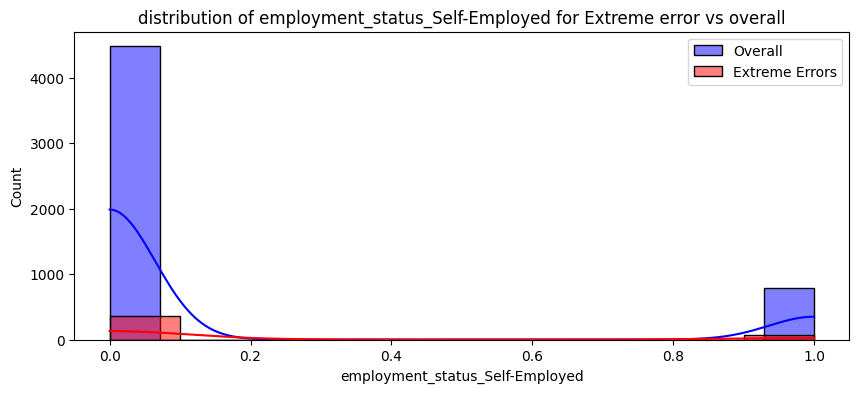

In [60]:
for feature in X_test.columns:
        plt.figure(figsize=(10,4))
        
        sns.histplot(X_test[feature],label="Overall",color='blue',alpha=0.5,kde=True)
        sns.histplot(extreme_error_df[feature],label="Extreme Errors",color='red',kde=True)
        plt.title(f'distribution of {feature} for Extreme error vs overall')
        plt.legend()
        plt.show()

In [61]:
extreme_error_df.columns,cols_to_scale

(Index(['unnamed:_0', 'age', 'number_of_dependants', 'income_level',
        'income_lakhs', 'insurance_plan', 'normalized_score', 'gender_Male',
        'region_Northwest', 'region_Southeast', 'region_Southwest',
        'marital_status_Unmarried', 'bmi_category_Obesity',
        'bmi_category_Overweight', 'bmi_category_Underweight',
        'smoking_status_Occasional', 'smoking_status_Regular',
        'employment_status_Salaried', 'employment_status_Self-Employed'],
       dtype='object'),
 ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan'])

In [62]:
extreme_error_df['income_level']=-1
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,6.0,1.0
1,22.0,0.0,-2.0,4.0,1.0
2,24.0,0.0,-2.0,1.0,1.0
3,24.0,1.0,-2.0,8.0,1.0
4,19.0,0.0,-2.0,9.0,1.0
...,...,...,...,...,...
430,20.0,0.0,-2.0,30.0,1.0
431,21.0,0.0,-2.0,28.0,1.0
432,20.0,0.0,-2.0,6.0,1.0
433,21.0,0.0,-2.0,8.0,1.0


<Axes: xlabel='age', ylabel='Count'>

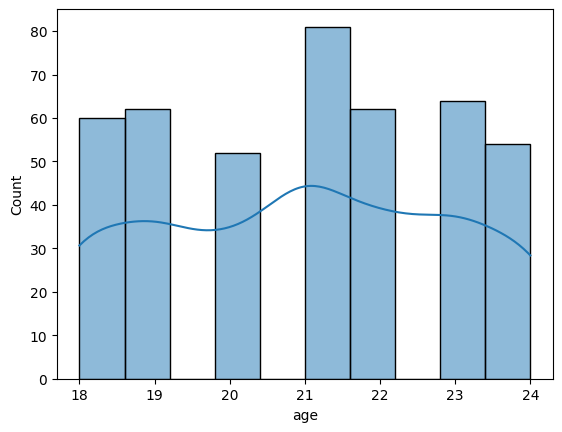

In [63]:
sns.histplot(df_reversed.age,kde=True)

In [64]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,435.000000,435.000000,435.0,435.000000,435.0
mean,20.990805,0.726437,-2.0,15.574713,1.0
std,1.946261,0.981917,0.0,12.033586,0.0
min,18.000000,0.000000,-2.0,1.000000,1.0
25%,19.000000,0.000000,-2.0,6.000000,1.0
50%,21.000000,0.000000,-2.0,12.000000,1.0
75%,23.000000,1.000000,-2.0,25.000000,1.0
max,24.000000,3.000000,-2.0,64.000000,1.0
